# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [40]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

df = pd.read_csv('housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.


In [24]:
# Exibindo as primeiras linhas do DataFrame
print(df.head())

# Exibindo as informações sobre o DataFrame
print(df.info())

# Exibindo estatísticas descritivas
print(df.describe())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data

In [28]:
# Verificando valores ausentes:
print(df.isnull().sum())

# Remoção de linhas com valores ausentes:
df = df.dropna()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [30]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [34]:
# Codificação de variáveis categóricas:
df = pd.get_dummies(df, drop_first=True)

df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [36]:
# Verificando se há valores ausentes e tratando:
df = df.dropna()  # Para simplicidade, removemos linhas com valores ausentes

# Calculando a matriz de correlação
corr_matrix = df.corr()


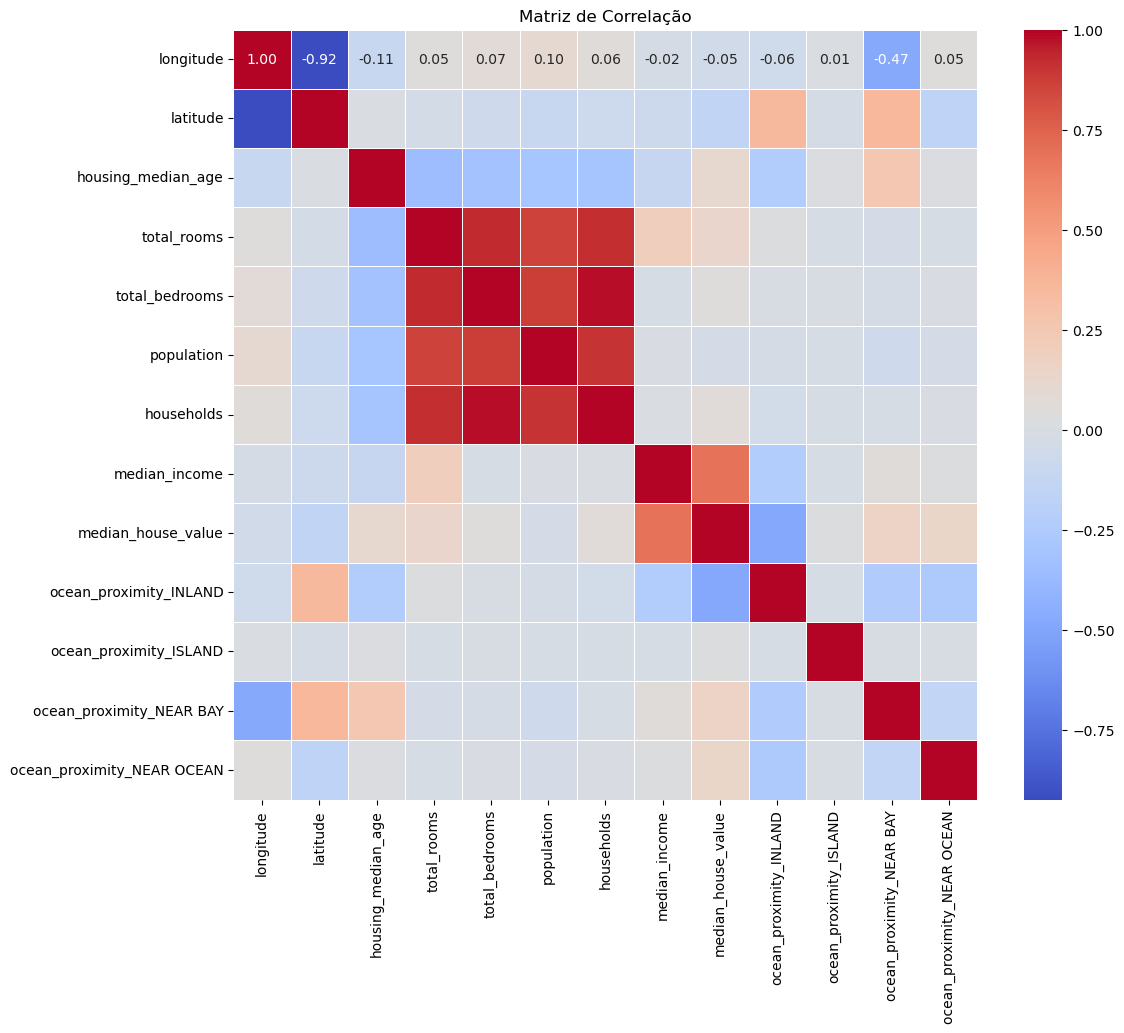

In [42]:
# Visualizando a matriz de correlação com um heatmap:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


Variável com potencial preditivo: housing_median_age

### 3. Separe os dados em validação e teste

In [99]:
# Calculando a matriz de correlação
corr_matrix = df.corr()

# Definindo as variáveis preditoras e alvo:
X = df[['housing_median_age']]  # Variável preditora
y = df['median_house_value']  # Variável alvo

# Separando os dados em conjunto de treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separando o conjunto de treinamento em treinamento e validação:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verificando os tamanhos dos conjuntos:
print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")


Tamanho do conjunto de treinamento: 13076
Tamanho do conjunto de validação: 3270
Tamanho do conjunto de teste: 4087


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

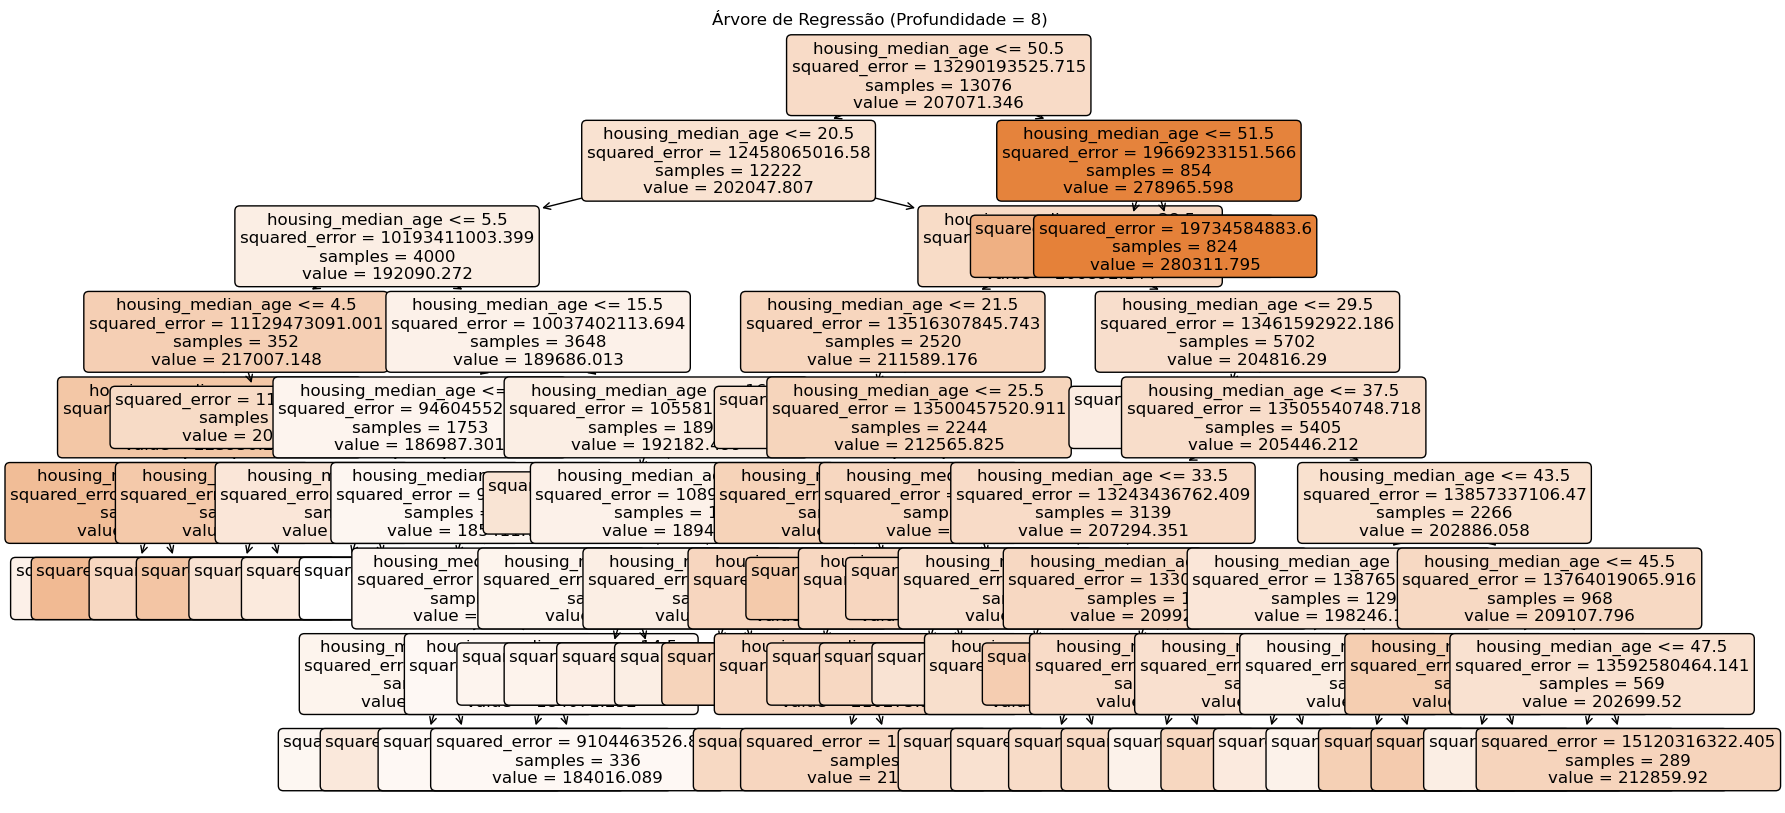

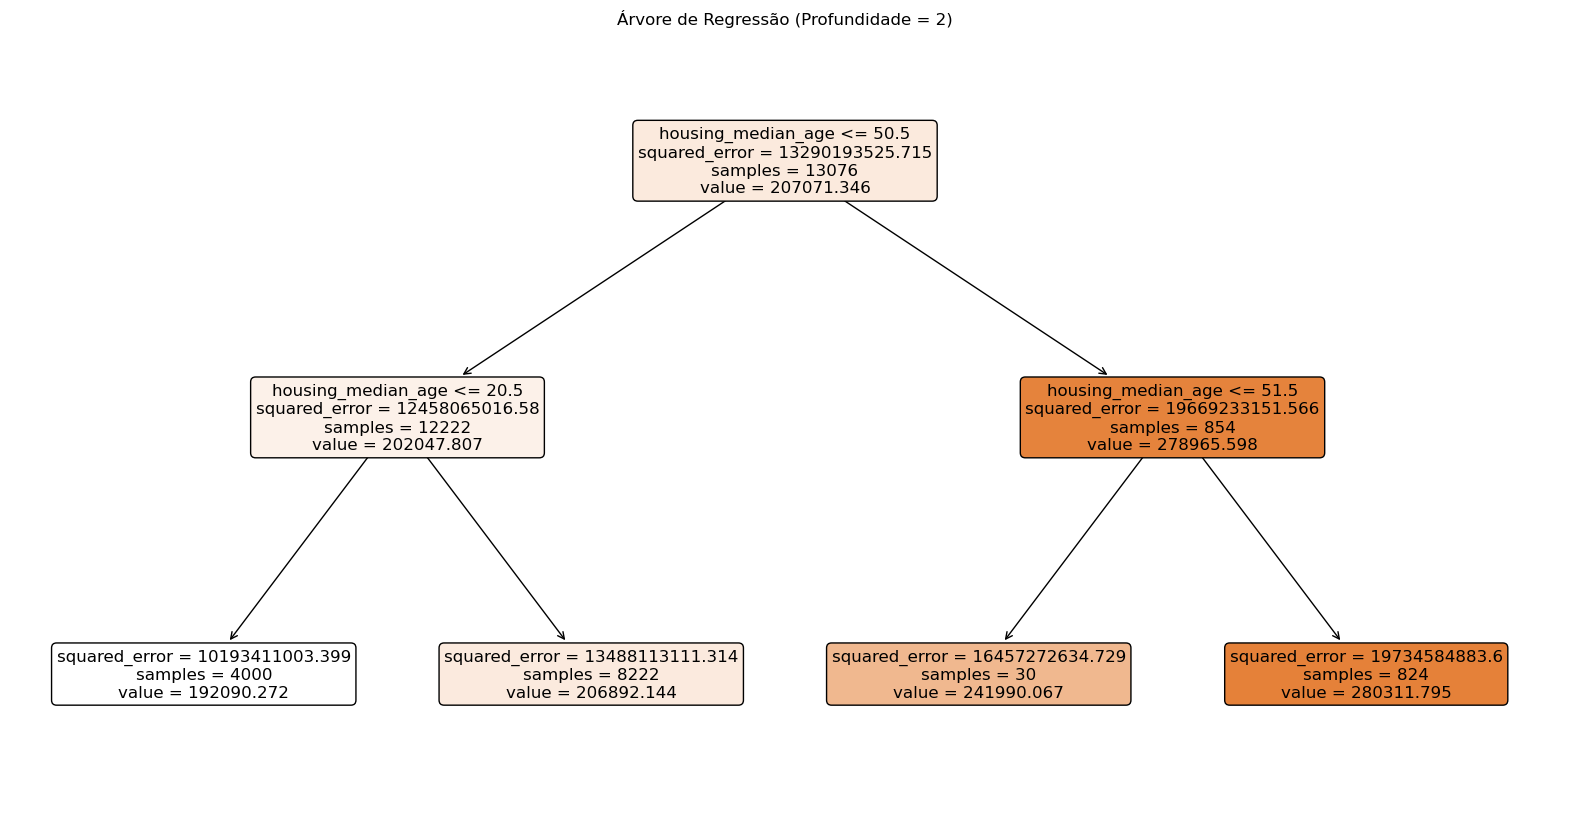

In [108]:
# Treinando a árvore de decisão com profundidade máxima = 8:
tree_regressor_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_regressor_8.fit(X_train, y_train)

# Treinando a árvore de decisão com profundidade máxima = 2:
tree_regressor_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_regressor_2.fit(X_train, y_train)

# Visualizando a árvore de decisão com profundidade máxima = 8:
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_regressor_8, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
plt.title('Árvore de Regressão (Profundidade = 8)')
plt.show()

# Visualizando a árvore de decisão com profundidade máxima = 2:
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_regressor_2, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
plt.title('Árvore de Regressão (Profundidade = 2)')
plt.show()


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [110]:
from sklearn.metrics import mean_squared_error

# Prevendo no conjunto de treinamento e teste com árvore de profundidade = 8:
y_train_pred_8 = tree_regressor_8.predict(X_train)
y_test_pred_8 = tree_regressor_8.predict(X_test)

# Prevendo no conjunto de treinamento e teste com árvore de profundidade = 2:
y_train_pred_2 = tree_regressor_2.predict(X_train)
y_test_pred_2 = tree_regressor_2.predict(X_test)

# Calculando o MSE para árvore com profundidade = 8:
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)

# Calculando o MSE para árvore com profundidade = 2:
mse_train_2 = mean_squared_error(y_train, y_train_pred_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

# Exibindo os resultados:
print(f'MSE (Profundidade = 8) - Treinamento: {mse_train_8:.2f}')
print(f'MSE (Profundidade = 8) - Teste: {mse_test_8:.2f}')
print(f'MSE (Profundidade = 2) - Treinamento: {mse_train_2:.2f}')
print(f'MSE (Profundidade = 2) - Teste: {mse_test_2:.2f}')


MSE (Profundidade = 8) - Treinamento: 12804550956.97
MSE (Profundidade = 8) - Teste: 13363526725.13
MSE (Profundidade = 2) - Treinamento: 12880691812.32
MSE (Profundidade = 2) - Teste: 13366204540.03


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore de Profundidade 2 me parece mais adequada.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

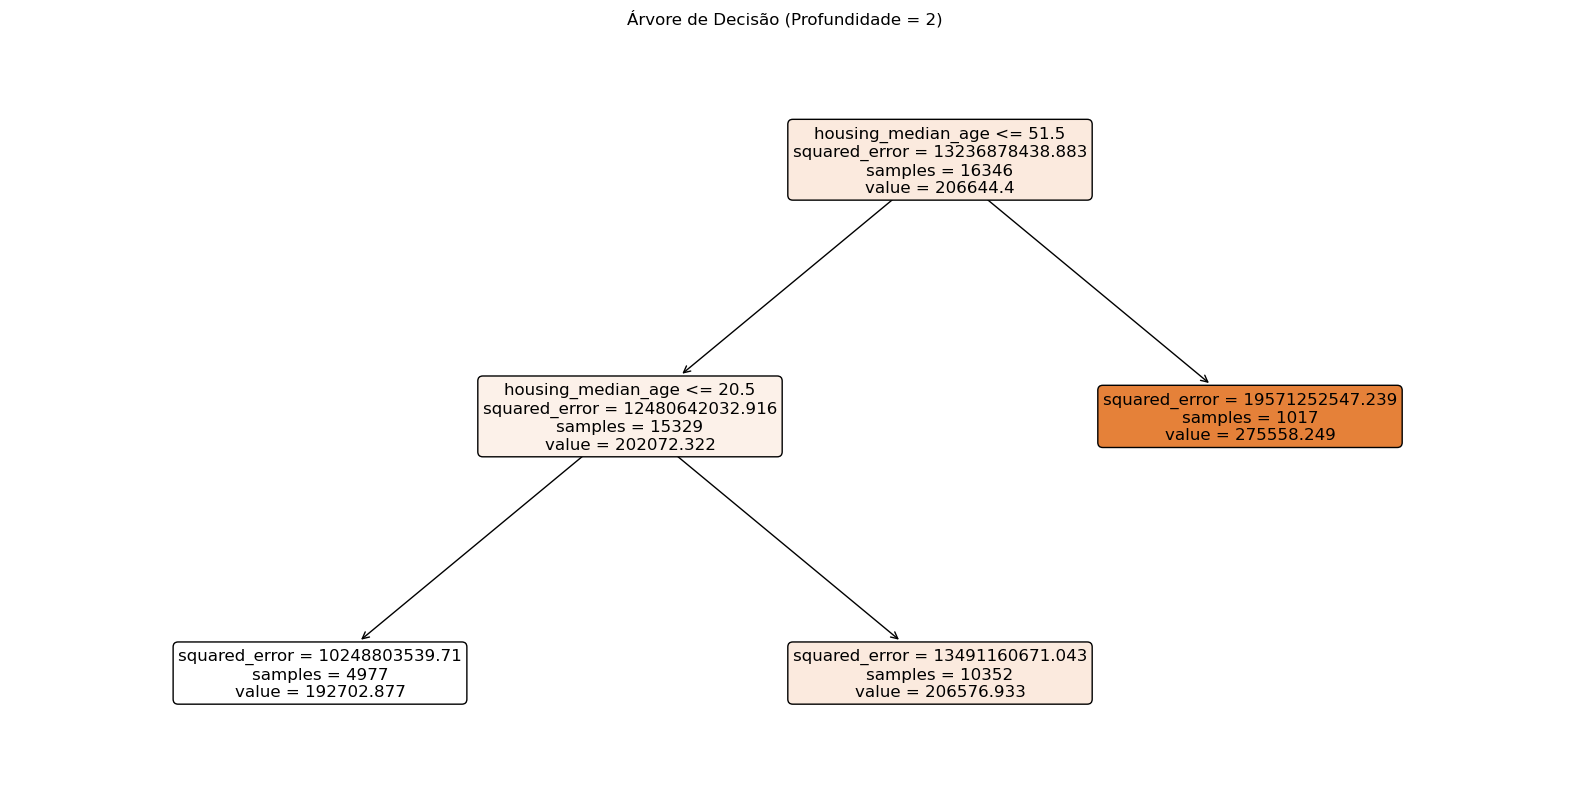

In [115]:
# Visualizando a árvore de decisão com profundidade máxima = 2:
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_regressor_2, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
plt.title('Árvore de Decisão (Profundidade = 2)')
plt.show()


Essa variável, com poucas folhas, nos ajuda a entender a idade média de habitação correlacionada com o valor médio da residência, deixando mais claro sobre a dinâmica dos imóveis na California.